# Simple RNN (many-to-one 문제)
- 사인파형 시계열을 입력으로 받아 다음 스텝의 출력을 예측.
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만든다.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = np.sin(np.arange(21)*np.pi/4) # pi = 180 degree
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

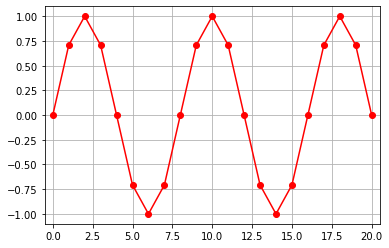

In [4]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5), plt.grid()
plt.show()
# input: 0.00000000e+00,  7.07106781e-01,  1.00000000e+00 --> output: 7.07106781e-01
# input: 7.07106781e-01,  1.22464680e-16, -7.07106781e-01 --> output: -1.00000000e+00

1. X_train, y_train 데이터 생성 

In [5]:
X_train = []
y_train = np.empty(len(s)-3) # 앞 3개는 첫 input이라서 output에서 제외
for i in range(len(s)-3):
  X_train.append(s[i:i+3])
  y_train[i] = s[i+3]
y_train # s 3번째~끝 데이터

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [6]:
np.array(X_train).shape

(18, 3)

In [7]:
# RNN의 데이터 형태로 사용 하기 위해서 X_train shape 변경
# 1-입력 데이터 갯수, 2-timesteps, 3-input dim(node?) 모양
X_train = np.array(X_train).reshape(-1,3,1)
X_train.shape
# 3개 한번에 받아서 1개 아웃풋 X 
# 3개 순서대로 받아서 1개 아웃풋!

(18, 3, 1)

In [8]:
X_train[0], y_train[0]

(array([[0.        ],
        [0.70710678],
        [1.        ]]), 0.7071067811865476)

In [9]:
X_train[1], y_train[1]

(array([[0.70710678],
        [1.        ],
        [0.70710678]]), 1.2246467991473532e-16)

2-1. 순환 신경망 모델 정의/설정

In [10]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [12]:
model = Sequential([
                   SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1, activation='linear') 
])
model.summary()
# 10개의 RNN애서 처리 후 Dense
# 파라미터 갯수 = (피처 갯수(아웃풋 갯수) + 유닛 갯수)* 유닛갯수 + 유닛갯수(바이어스)
# 120 = (1 + 10)*10 + 10 

# 유닛 갯수 많으면 잘 처리함! (텍스트 처리시) --> 하지만 파라미터 많아져서 힘들어해 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile('adam', loss='mse')

2-2. 모델 학습 전

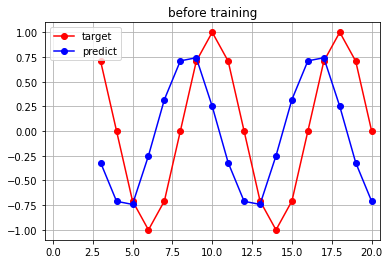

In [14]:
plt.plot(np.arange(3,21), y_train, 'ro-', label='target') 
plt.plot(np.arange(3,21), model.predict(X_train), 'bo-', label='predict')
plt.xlim(-0.5,20.5), plt.grid()
plt.legend(), plt.title('before training')
plt.show()

3-1. 모델 학습 

In [15]:
hist = model.fit(X_train, y_train, epochs=100, verbose=0)

3-2. 모델 학습 후

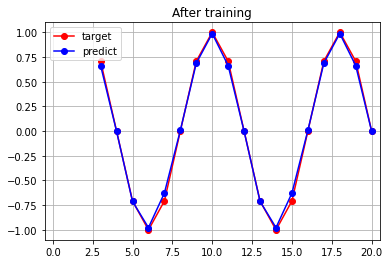

In [16]:
plt.plot(np.arange(3,21), y_train, 'ro-', label='target') 
plt.plot(np.arange(3,21), model.predict(X_train), 'bo-', label='predict')
plt.xlim(-0.5,20.5), plt.grid()
plt.legend(), plt.title('After training')
plt.show()

In [17]:
model2 = Sequential([
                   SimpleRNN(5, input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1, activation='linear') 
])
model3 = Sequential([
                   SimpleRNN(20, input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1, activation='linear') 
])
#model.summary()

In [18]:
model2.compile('adam', loss='mse')
model3.compile('adam', loss='mse')

In [18]:
hist2 = model2.fit(X_train, y_train, epochs=100, verbose=0)
hist3 = model3.fit(X_train, y_train, epochs=100, verbose=0)

In [38]:
def model_sch(model, num):
  model = Sequential([
                   SimpleRNN(5, input_shape=X_train.shape[1:], activation='tanh'),
                   Dense(1, activation='linear') ])
  
  model.compile('adam', loss='mse')

  hist = model.fit(X_train, y_train, epochs=100, verbose=0) 

In [39]:
model_sch(model2, 5)
model_sch(model3, 20)

In [45]:
def plot(model, num):
  #plt.figure(figsize=(15,4))
  #plt.subplot(1,3,1)
  plt.plot(np.arange(3,21), y_train, 'ro-', label='target') 
  plt.plot(np.arange(3,21), model.predict(X_train), 'bo-', label='predict')
  plt.xlim(-0.5,20.5), plt.grid()
  plt.legend(), plt.title('Number of Nodes = ' + str(num))

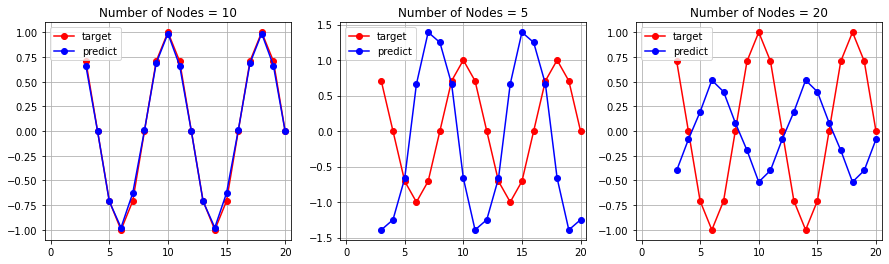

In [46]:
m = [(model, 10), (model2, 5), (model3, 20)]
plt.figure(figsize=(15,4))
for i in range(len(m)):
  plt.subplot(1,3, i+1)
  plot(m[i][0], m[i][1])
plt.show()